In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import sklearn


In [34]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [35]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import regularizers
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import mean_squared_logarithmic_error, mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from scikeras.wrappers import KerasRegressor

In [36]:
df=pd.read_csv("../Datasets/analytical_table.csv")

In [37]:
df.head(1)

,price,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,category,type,sub_type,state,locality,list_year,list_month
0,200000.0,5,5,5.0,0,0,0,0,For Rent,House,Townhouse,Nairobi,Nairobi Central,2021,7


In [38]:
df.shape

(6930, 15)

In [39]:
df=df.loc[(df['category']=='For Rent')]

In [40]:
df.shape

(3584, 15)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3584 entries, 0 to 3583
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       3584 non-null   float64
 1   bedrooms    3584 non-null   int64  
 2   bathrooms   3584 non-null   int64  
 3   toilets     3584 non-null   float64
 4   furnished   3584 non-null   int64  
 5   serviced    3584 non-null   int64  
 6   shared      3584 non-null   int64  
 7   parking     3584 non-null   int64  
 8   category    3584 non-null   object 
 9   type        3584 non-null   object 
 10  sub_type    3584 non-null   object 
 11  state       3584 non-null   object 
 12  locality    3584 non-null   object 
 13  list_year   3584 non-null   int64  
 14  list_month  3584 non-null   int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 448.0+ KB


In [42]:
df.category.unique()

array(['For Rent'], dtype=object)

In [43]:
df.type.unique()

array(['House', 'Apartment'], dtype=object)

In [44]:
df.sub_type.unique()

array(['Townhouse', 'Missing', 'Detached Duplex', 'Detached Bungalow',
       'Mini Flat', 'Semi-detached Duplex', 'Terraced Bungalow',
       'Bedsitter (Single Room)', 'Block of Flats',
       'Semi-detached Bungalow', 'Terraced Duplex'], dtype=object)

In [45]:
df.state.unique()

array(['Nairobi', 'Kiambu', 'Kajiado', 'Mombasa'], dtype=object)

In [46]:
df.locality.unique()

array(['Nairobi Central', 'Parklands', 'Lavington', 'Westlands',
       'Kileleshwa', 'Kitisuru', 'Kabete', 'Kilimani', 'Karen',
       'Kitengela', 'Mugumo-Ini (Langata)', 'Thika', 'Ruiru', 'Kasarani',
       'Kikuyu', 'Juja', 'Nairobi West', 'Ngong', 'Nyali',
       'Ongata Rongai', 'Bamburi', 'Embakasi'], dtype=object)

In [47]:
lb_encoder = LabelEncoder()
df['category'] = lb_encoder.fit_transform(df['category'])
df['type'] = lb_encoder.fit_transform(df['type'])
df['sub_type'] = lb_encoder.fit_transform(df['sub_type'])
df['state'] = lb_encoder.fit_transform(df['state'])
df['locality'] = lb_encoder.fit_transform(df['locality'])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3584 entries, 0 to 3583
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       3584 non-null   float64
 1   bedrooms    3584 non-null   int64  
 2   bathrooms   3584 non-null   int64  
 3   toilets     3584 non-null   float64
 4   furnished   3584 non-null   int64  
 5   serviced    3584 non-null   int64  
 6   shared      3584 non-null   int64  
 7   parking     3584 non-null   int64  
 8   category    3584 non-null   int32  
 9   type        3584 non-null   int32  
 10  sub_type    3584 non-null   int32  
 11  state       3584 non-null   int32  
 12  locality    3584 non-null   int32  
 13  list_year   3584 non-null   int64  
 14  list_month  3584 non-null   int64  
dtypes: float64(2), int32(5), int64(8)
memory usage: 378.0 KB


In [49]:
# Split the labels and features in original dataset
features = df.drop("price", axis=1)
labels = df["price"].copy()

In [50]:
for column in features:
    if features[column].dtypes == 'int64':
        features[column] = StandardScaler().fit_transform(features[column].values.reshape(-1, 1))
display(features)

,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,category,type,sub_type,state,locality,list_year,list_month
0,1.463636,1.469917,5.0,-0.351942,-0.317391,-0.120147,-0.785696,0,1,10,3,13,-1.147842,0.166087
1,0.130725,0.188277,3.0,-0.351942,-0.317391,-0.120147,-0.785696,0,0,5,3,18,-1.147842,0.166087
2,0.130725,0.188277,3.0,-0.351942,-0.317391,-0.120147,-0.785696,0,0,5,3,11,-1.147842,0.166087
3,-0.535731,-0.452543,2.0,2.841376,-0.317391,-0.120147,-0.785696,0,0,5,3,21,-1.147842,0.166087
4,0.797181,0.829097,4.0,-0.351942,-0.317391,-0.120147,-0.785696,0,1,10,3,11,-1.147842,0.166087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,0.130725,0.188277,3.0,-0.351942,-0.317391,-0.120147,0.645528,0,1,3,3,12,1.219170,-0.162059
3580,0.130725,0.188277,3.0,-0.351942,-0.317391,-0.120147,0.645528,0,1,2,3,1,1.219170,-0.162059
3581,-0.535731,-0.452543,2.0,-0.351942,-0.317391,-0.120147,0.645528,0,1,6,0,15,1.219170,-0.162059
3582,-1.202186,-1.093363,1.0,-0.351942,-0.317391,-0.120147,-0.070084,0,1,6,3,5,1.219170,-0.162059


In [51]:
for column in features:
    if features[column].dtypes == 'float64':
        features[column] = StandardScaler().fit_transform(features[column].values.reshape(-1, 1))
display(features)

,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,category,type,sub_type,state,locality,list_year,list_month
0,1.463636,1.469917,1.873415,-0.351942,-0.317391,-0.120147,-0.785696,0,1,10,3,13,-1.147842,0.166087
1,0.130725,0.188277,0.796194,-0.351942,-0.317391,-0.120147,-0.785696,0,0,5,3,18,-1.147842,0.166087
2,0.130725,0.188277,0.796194,-0.351942,-0.317391,-0.120147,-0.785696,0,0,5,3,11,-1.147842,0.166087
3,-0.535731,-0.452543,0.257583,2.841376,-0.317391,-0.120147,-0.785696,0,0,5,3,21,-1.147842,0.166087
4,0.797181,0.829097,1.334804,-0.351942,-0.317391,-0.120147,-0.785696,0,1,10,3,11,-1.147842,0.166087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,0.130725,0.188277,0.796194,-0.351942,-0.317391,-0.120147,0.645528,0,1,3,3,12,1.219170,-0.162059
3580,0.130725,0.188277,0.796194,-0.351942,-0.317391,-0.120147,0.645528,0,1,2,3,1,1.219170,-0.162059
3581,-0.535731,-0.452543,0.257583,-0.351942,-0.317391,-0.120147,0.645528,0,1,6,0,15,1.219170,-0.162059
3582,-1.202186,-1.093363,-0.281027,-0.351942,-0.317391,-0.120147,-0.070084,0,1,6,3,5,1.219170,-0.162059


In [52]:
for column in features:
    if features[column].dtypes == 'int32':
        features[column] = StandardScaler().fit_transform(features[column].values.reshape(-1, 1))
display(features)

,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,category,type,sub_type,state,locality,list_year,list_month
0,1.463636,1.469917,1.873415,-0.351942,-0.317391,-0.120147,-0.785696,0.0,1.104172,2.414852,0.507041,0.035731,-1.147842,0.166087
1,0.130725,0.188277,0.796194,-0.351942,-0.317391,-0.120147,-0.785696,0.0,-0.905656,-0.119654,0.507041,0.787255,-1.147842,0.166087
2,0.130725,0.188277,0.796194,-0.351942,-0.317391,-0.120147,-0.785696,0.0,-0.905656,-0.119654,0.507041,-0.264879,-1.147842,0.166087
3,-0.535731,-0.452543,0.257583,2.841376,-0.317391,-0.120147,-0.785696,0.0,-0.905656,-0.119654,0.507041,1.238170,-1.147842,0.166087
4,0.797181,0.829097,1.334804,-0.351942,-0.317391,-0.120147,-0.785696,0.0,1.104172,2.414852,0.507041,-0.264879,-1.147842,0.166087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,0.130725,0.188277,0.796194,-0.351942,-0.317391,-0.120147,0.645528,0.0,1.104172,-1.133456,0.507041,-0.114574,1.219170,-0.162059
3580,0.130725,0.188277,0.796194,-0.351942,-0.317391,-0.120147,0.645528,0.0,1.104172,-1.640357,0.507041,-1.767927,1.219170,-0.162059
3581,-0.535731,-0.452543,0.257583,-0.351942,-0.317391,-0.120147,0.645528,0.0,1.104172,0.387248,-3.039936,0.336341,1.219170,-0.162059
3582,-1.202186,-1.093363,-0.281027,-0.351942,-0.317391,-0.120147,-0.070084,0.0,1.104172,0.387248,0.507041,-1.166708,1.219170,-0.162059


In [53]:
features = features.drop(['sub_type', 'state', 'category', 'list_year', 'list_month'], axis=1)


In [54]:
features.head(1)

,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,type,locality
0,1.463636,1.469917,1.873415,-0.351942,-0.317391,-0.120147,-0.785696,1.104172,0.035731


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3584 entries, 0 to 3583
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       3584 non-null   float64
 1   bedrooms    3584 non-null   int64  
 2   bathrooms   3584 non-null   int64  
 3   toilets     3584 non-null   float64
 4   furnished   3584 non-null   int64  
 5   serviced    3584 non-null   int64  
 6   shared      3584 non-null   int64  
 7   parking     3584 non-null   int64  
 8   category    3584 non-null   int32  
 9   type        3584 non-null   int32  
 10  sub_type    3584 non-null   int32  
 11  state       3584 non-null   int32  
 12  locality    3584 non-null   int32  
 13  list_year   3584 non-null   int64  
 14  list_month  3584 non-null   int64  
dtypes: float64(2), int32(5), int64(8)
memory usage: 378.0 KB


In [56]:
# Call train_test_split function from sklearn library to split the dataset randomly
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=1/3, random_state=126)

In [57]:
print( len(X_train), len(X_test), len(Y_train), len(Y_test) )

2389 1195 2389 1195


In [58]:
df.shape

(3584, 15)

In [59]:
class ANNRegressor(BaseEstimator, RegressorMixin):
    # Constructor to instantiate default or user-defined values
    def __init__(self, in_features=13, num_hidden=1, num_neurons=40, epochs=50,
                    batch_norm=False, early_stopping=True, verbose=1):
        self.in_features = in_features
        self.num_hidden = num_hidden
        self.num_neurons = num_neurons
        self.batch_norm = batch_norm
        self.epochs = epochs
        self.early_stopping = early_stopping
        self.verbose = verbose

        # Build the ANN
        self.model = ANNRegressor.build_model(self.in_features, self.num_hidden, self.num_neurons, self.batch_norm)

    @staticmethod
    def build_model(in_features, num_hidden, num_neurons, batch_norm):
        model = Sequential()

        # Input layer
        model.add(Dense(num_neurons, input_shape=(in_features,), activation='relu'))

        # Add hidden layers to model
        if (num_hidden > 1):
            for i in range(num_hidden - 1):
                model.add(Dense(num_neurons, activation='relu'))
                if(batch_norm):
                    model.add(BatchNormalization())

        # Output layer
        model.add(Dense(1))

        return model

    def fit(self, X, Y):
        # Split into training and validating sets
        X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=1/3)

        # Specifies callbacks list
        callbacks = [
            ModelCheckpoint('models/annmodel.weights.hdf5', save_best_only=True, verbose=self.verbose)

        ]

        # Use early stopping to stop training when validation error reaches minimum
        if(self.early_stopping):
            callbacks.append(EarlyStopping(monitor='val_loss', patience=10, verbose=self.verbose))

        # Compile the model then train
        nadam = Nadam(learning_rate=0.001)
        self.model.compile(optimizer=nadam, loss='mse')
        self.model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=self.epochs,
                       callbacks=callbacks, verbose=self.verbose)

        model_json = self.model.to_json()
        with open("../models/annmodel.json", "w") as json_file:
            json_file.write(model_json)
        self.model.save('../models/ann_housing.h5')

    def predict(self, X):
        predictions = self.model.predict(X)

        return predictions

In [60]:
X_train = np.asarray(X_train).astype(np.float32)
Y_train = np.asarray(Y_train).astype(np.float32)

In [61]:
annRegressor = ANNRegressor(in_features=X_train.shape[1], num_hidden=25, num_neurons=45, epochs=29, verbose=1)
annRegressor.fit(X_train, Y_train)

Epoch 1/29


48/50 [===========================>..] - ETA: 0s - loss: 23879436288.0000
Epoch 1: val_loss improved from inf to 6916873216.00000, saving model to models\annmodel.weights.hdf5
50/50 [==============================] - 11s 19ms/step - loss: 23468894208.0000 - val_loss: 6916873216.0000
Epoch 2/29
10/50 [=====>........................] - ETA: 0s - loss: 6316783616.0000

c:\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


49/50 [============================>.] - ETA: 0s - loss: 7891183616.0000
Epoch 2: val_loss improved from 6916873216.00000 to 4648373248.00000, saving model to models\annmodel.weights.hdf5
50/50 [==============================] - 1s 14ms/step - loss: 7834173952.0000 - val_loss: 4648373248.0000
Epoch 3/29
48/50 [===========================>..] - ETA: 0s - loss: 5786742272.0000
Epoch 3: val_loss improved from 4648373248.00000 to 4344659968.00000, saving model to models\annmodel.weights.hdf5
50/50 [==============================] - 1s 24ms/step - loss: 5776671744.0000 - val_loss: 4344659968.0000
Epoch 4/29
46/50 [==========================>...] - ETA: 0s - loss: 5684051456.0000
Epoch 4: val_loss improved from 4344659968.00000 to 4299831808.00000, saving model to models\annmodel.weights.hdf5
50/50 [==============================] - 1s 24ms/step - loss: 5576883712.0000 - val_loss: 4299831808.0000
Epoch 5/29
47/50 [===========================>..] - ETA: 0s - loss: 5248076288.0000
Epoch 5: val

38/38 [==============================] - 0s 3ms/step


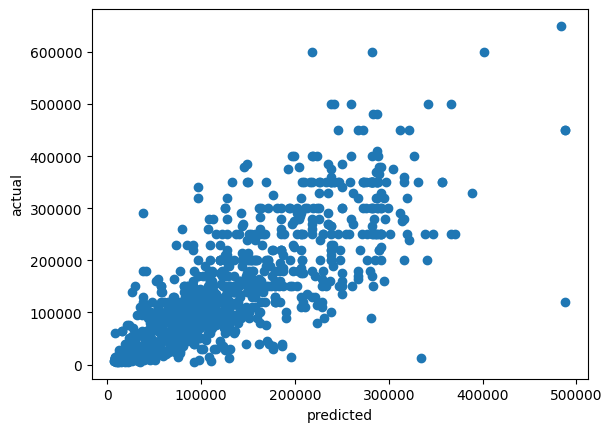

In [62]:
NN_pred = annRegressor.predict(X_test)
plt.scatter(NN_pred, Y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [63]:
# Method to display model evaluation metrics
def display_model_metrics(label, predictions):
    # The mean absolute error
    print("Mean absolute error: %.4f\n" % mean_absolute_error(label, predictions))

    # The mean squared error
    print("Root mean squared error: %.4f\n" % np.sqrt(mean_squared_error(label, predictions)))

    # The coefficient of determination: 1 is perfect prediction R^2
    print("Coefficient of determination: %.4f\n" % r2_score(label, predictions))

predictions = annRegressor.predict(X_test)
display(Y_test)
display(predictions)

display_model_metrics(Y_test, predictions[:,-1])

38/38 [==============================] - 0s 4ms/step


3469    200000.0
2816      7000.0
3395    350000.0
268     140000.0
1043     70000.0
          ...   
2706     13000.0
1761    400000.0
1472     40000.0
946     260000.0
2078    190000.0
Name: price, Length: 1195, dtype: float64

array([[144057.9  ],
       [  8557.459],
       [133247.95 ],
       ...,
       [ 71087.516],
       [ 79354.12 ],
       [173727.28 ]], dtype=float32)

Mean absolute error: 42129.7812

Root mean squared error: 63754.4727

Coefficient of determination: 0.6704



In [64]:
import pickle

pickle.dump(annRegressor, open('../models/annmodel.pkl', 'wb'))


INFO:tensorflow:Assets written to: C:\Users\yahya\AppData\Local\Temp\tmp17xmi6_1\assets


INFO:tensorflow:Assets written to: C:\Users\yahya\AppData\Local\Temp\tmp17xmi6_1\assets
